# Global x Local temperature analysis
In this document we'll compare the Global temperature variations with the Local temperature, considering the city of Curitiba-PR Brazil for the Local temp. and ranging from the year 1832 to 2013.

![Botanical garden of Curitiba](https://media-cdn.tripadvisor.com/media/photo-s/01/55/38/01/jardim-botanico.jpg)
*Botanical garden of Curitiba - Photo from Tripadvisor.*

## Extracting the data
First of all we need to extract the data to make our analysis. From the database provided by Udacity I extracted two CSV files, one with the Global temperature and the other with the Local temperature. For normalized results, I filtered in the SQL query for the Global dataset to only return results compatible with the years available in the Local dataset.

Below are the SQL queries used for the extraction:

**Global dataset query**
```SQL
SELECT
	*
FROM global_data g
WHERE g.year BETWEEN 1832 AND 2013
```

**Local dataset query** 
```SQL
SELECT
	*
FROM city_data c
WHERE c.city = 'Curitiba'
```

## Analysing the data
After extracting the data of the database it's time to prepare the environment for the analysis and import the datasets in the notebook.

I'm using [Conda](https://docs.conda.io/en/latest/#) to setup the environment and running the analysis on a [Jupyter Notebook](https://jupyter.org/).

### Importing modules and loading the data
First of all I import all the modules that I need and also load the datasets previosly exported from the Udacity database.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as ply

% matplotlib inline

df_global = pd.read_csv('data/global.csv', index_col='year')
df_local = pd.read_csv('data/local.csv', index_col='year')

### Preparing data for analysis
After loading the data it's necessary to add the Moving Average for the datasets, to improve the analysis I added two averages considering two windows one shorter than the other for tendency analysis.

Then I remove `NaN` values to not impact in the analysis.

In [2]:
# vars to define window of MA
shortWindow=2
longWindow=6

# prepare local dataset
df_local['avg_ma']=df_local['avg_temp'].rolling(window=shortWindow).mean()
df_local['avg_ma2']=df_local['avg_temp'].rolling(window=longWindow).mean()

# prepare global dataset
df_global['avg_ma'] = df_global['avg_temp'].rolling(window=shortWindow).mean()
df_global['avg_ma2'] = df_global['avg_temp'].rolling(window=longWindow).mean()

# fill na values with mean
df_local.fillna(df_local.mean(), inplace=True)
df_global.fillna(df_global.mean(), inplace=True)

### Ploting the data

With the dataset prepared we can now plot the data in a line graph using `matplotlib` module.

In this case we plot the graphs separately because of the difference in the Y axis, this way the visualization is simplified making comparing easier.

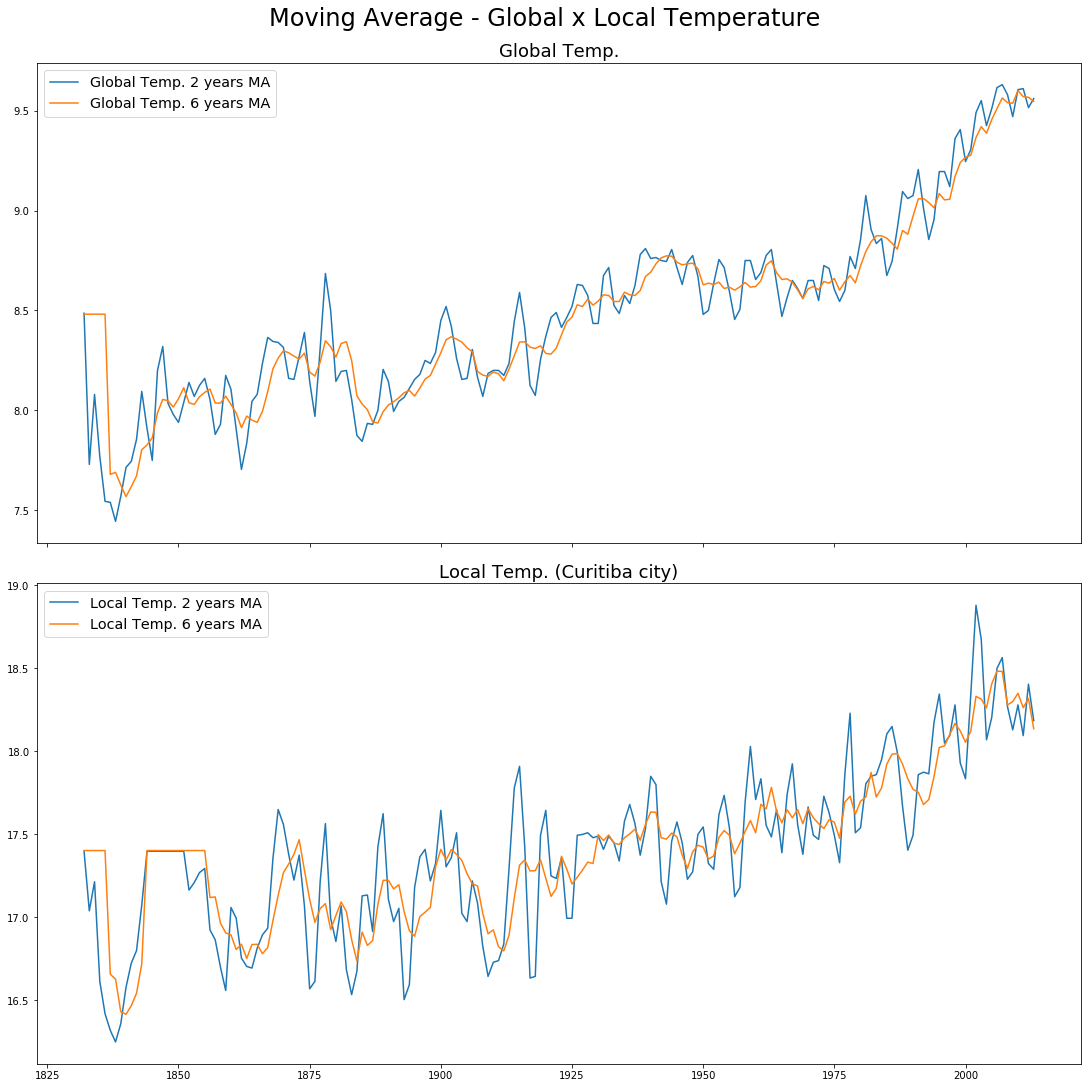

In [65]:
# Add opts and minimize height space between lines
fig, axs = ply.subplots(2,1,sharex=True, figsize=(15,15), constrained_layout=True)
fig.suptitle('Moving Average - Global x Local Temperature', fontsize=24)

# Add title to the graph
ply.title('Global x Local Temperature (Curitiba city)')

# Plot global graph
axs[0].set_title('Global Temp.', fontsize=18)
axs[0].plot(df_global['avg_ma'], label='Global Temp. {} years MA'.format(shortWindow))
axs[0].plot(df_global['avg_ma2'], label='Global Temp. {} years MA'.format(longWindow))
axs[0].legend(loc='upper left', fontsize='x-large')

# Plot local graph right bellow
axs[1].set_title('Local Temp. (Curitiba city)', fontsize=18)
axs[1].plot(df_local['avg_ma'], label='Local Temp. {} years MA'.format(shortWindow))
axs[1].plot(df_local['avg_ma2'], label='Local Temp. {} years MA'.format(longWindow))
axs[1].legend(loc='upper left', fontsize='x-large');

### Making observations

With our graphs ready we can now make some observations and find relations in the data.

One thing that I want to point out is that Curitiba is known to be a cold city compared with other capitals in Brazil, the common sense is that compared with what is expected from the other cities Curitiba is colder. Now, with this data, we can't validate this common sense, but we can observe some similarities between the both graphs.

1. The rising of the temperature over the years is similar and the tendency of keep on rising may be expected.
2. Although the common sense may be that Curitiba city is colder than the average, this city in Brazil is far warmer than the Global Average, looking for the Y Axis of the graphs we can notice the difference being that the Local temperature ranges between near 15˚ to almost 19˚, against the Global Average that goes from almost 7˚ to near 10˚, far bellow the Local city average.
3. Another thing that is important to notice is that in the last few years the temperature is rising faster than the previous decades, this could mean a tendency of a higher temperature in the next years.
4. We can notice the temparature changing behavior in some windows in the graph, every 20 years or so there are a rise and fall and after the temperature rises and the behavior repeats. I'll plot bellow those windows of 20 years or so for making this observation clearer.

In [27]:
figsize = (12,10)
cols = 4
rows = 3
range_gap = 10
range_increment = range_gap

In [18]:
fig1, axs1 = ply.subplots(rows, cols, figsize=figsize, constrained_layout=True)


# df_local['avg_ma'][df_local.index > 1990]


for ax, df_local.index in zip(axs1, df_local.index):
    ax.set_title('From %start to %finish' % start)


Rolling [window=2,center=False,axis=0]

## Exporting the data

Now we just need to export the data, I'm using a lighter version of LaTeX called [TinyTeX](https://yihui.name/tinytex/) for installing only the packages needed and saving some drive space.

In [31]:
for i in df_local.index[:4]:
    print(df_local['avg_ma'][i])

17.398699421965322
17.04
17.215
16.615000000000002
